In [1]:
# Ususal suspects! 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [29]:
# Reading the data
df = pd.read_csv('movies.csv')

In [30]:
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0


name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64


<BarContainer object of 15 artists>

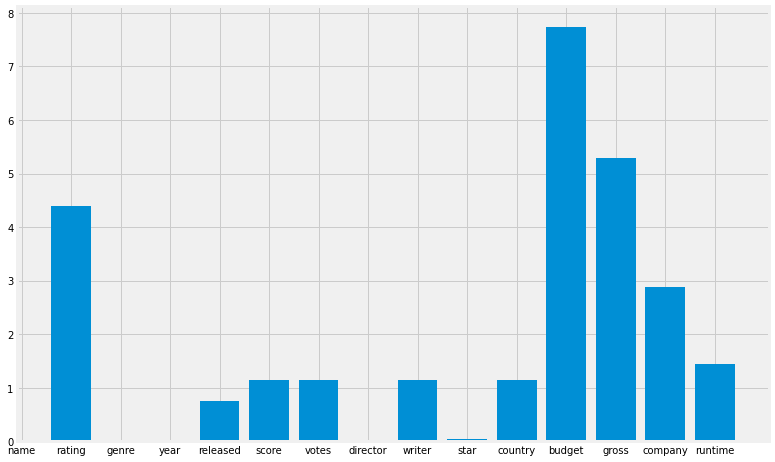

In [31]:
np.seterr(divide = 'ignore') # Setting the warning to ignore dividing be zero
print((df.isna().sum()/df.shape[0])*100) # Percent of missing values
plt.bar(x=df.columns,height=np.log(df.isnull().sum())+0.05) # Visualizing missing values

In [32]:
# Changing the daatatype even if it contains NA
# df.budget = df.budget.astype('Int64')
# df.gross = df.gross.astype('Int64')

In [33]:
# The year column is not always consistent with the released year. Creating a new column year_split based on the released
df['year'] = df.released.str.extract(r'(\d{4})')
df.year = df.year.astype(np.float).astype("Int64")

In [34]:
df = df.sort_values('gross', ascending=False)

In [35]:
# Check for duplicates
df.duplicated().sum()
df.gross.astype('float')

5445    2.847246e+09
7445    2.797501e+09
3045    2.201647e+09
6663    2.069522e+09
7244    2.048360e+09
            ...     
7663             NaN
7664             NaN
7665             NaN
7666             NaN
7667             NaN
Name: gross, Length: 7668, dtype: float64

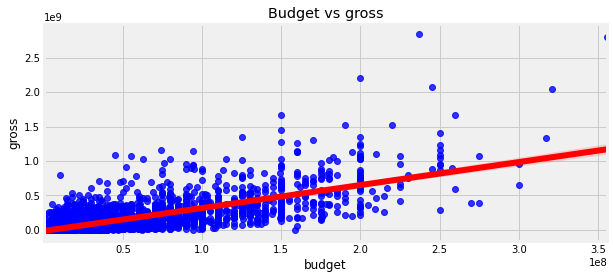

In [36]:
plt.figure(figsize=(9,4))
plt.title('Budget vs gross')
sns.regplot(data = df, x = 'budget', y = 'gross', scatter_kws={'color':'blue'}, line_kws={'color':'red'});

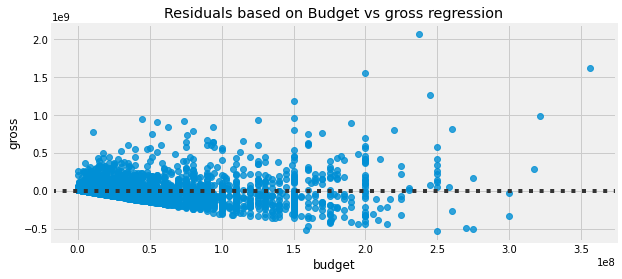

In [37]:
plt.figure(figsize=(9,4))
plt.title('Residuals based on Budget vs gross regression')
sns.residplot(data = df, x = 'budget', y = 'gross');

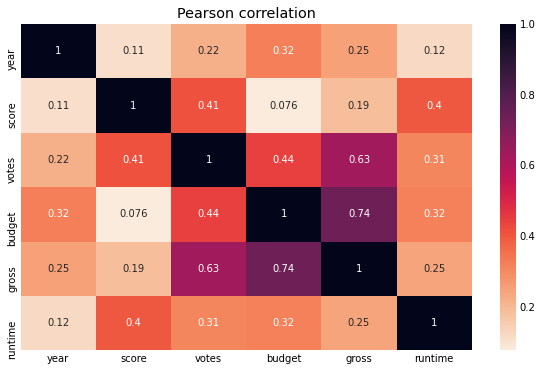

In [38]:
plt.figure(figsize=(9,6))
cmap = sns.cm.rocket_r
plt.title('Pearson correlation')
sns.heatmap(df.corr(),annot=True,cmap=cmap);

In [48]:
# assigning objects in dataframe a numerical category 
df_num = df[df.columns.drop(['name','released'])].copy()
for column in df_num:
    if df_num[column].dtype == 'object':
        df_num[column] = df_num[column].astype('category')
        df_num[column] = df_num[column].cat.codes
df_num.head()

,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,5,0,2009,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0
7445,5,0,2019,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0
3045,5,6,1997,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0
6663,5,0,2015,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0
7244,5,0,2018,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0


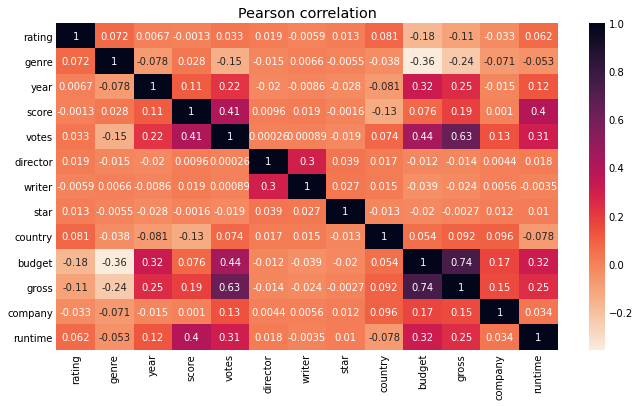

In [60]:
plt.figure(figsize=(10,6))
plt.title('Pearson correlation')
sns.heatmap(df_num.corr(),annot=True,cmap=cmap);

In [80]:
high_corr = df_num.corr().unstack()[(df_num.corr().unstack().sort_values() > 0.5) & (df_num.corr().unstack().sort_values()!= 1)]
display(high_corr)

votes   gross     0.630757
budget  gross     0.740395
gross   votes     0.630757
        budget    0.740395
dtype: float64